In [43]:
import sys
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random

from IPython.display import display

#from sklearn.decomposition import PCA
import sklearn.linear_model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.keras.utils.vis_utils import plot_model

sys.path.insert(0,'radiative_models')
import radiative_models
reload(radiative_models)
#import radiative_models as rm

new


<module 'radiative_models' from 'radiative_models/radiative_models.py'>

## Single variable/output model & one deep layer

### The data

In [44]:
def get_data(nr_train = 10000):
    nr_test = int(0.2* nr_train)
    # Now the spectra are the OUTPUT
    Y_train, train_crystaline_threshold, train_grid = radiative_models.generate_opticallythin_spectra(nr_train)#generate_spectra(10000)
    Y_test, test_crystaline_threshold, test_grid = radiative_models.generate_opticallythin_spectra(nr_test)

    # We will start with trying to fit the temperature of the spectrum
    a_fo, a_en, a_am, Ts = train_grid.T
    a_fo_max_train, a_en_max_train, Ts_max_train = max(a_fo), max(a_en), max(Ts)
    X_train = np.array([a_fo/max(a_fo), a_en/max(a_en), Ts/max(Ts)]).T
    a_fo, a_en, a_am, Ts = test_grid.T
    X_test = np.array([a_fo/max(a_fo), a_en/max(a_en), Ts/max(Ts)]).T
    
    return X_train, Y_train, X_test, Y_test, a_fo_max_train, a_en_max_train, Ts_max_train 

## The model

In [45]:
def run_model(X_train, Y_train, X_test, Y_test, neurons = 128, learning_rate=0.005, epochs = 100, verbose=0):

    def make_model(input_shape, output_shape):
        input_data = tf.keras.Input(shape=input_shape)
        D1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)
        output = tf.keras.layers.Dense(units= output_shape, name='output')(D1)
        model = tf.keras.Model(inputs=input_data, outputs=output)
        return model

    model = make_model((X_train.shape[1],), (Y_train.shape[1]),)

    display(plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png'))
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = tf.keras.optimizers.SGD(lr=learning_rate)
    metrics={'output': tf.keras.metrics.RootMeanSquaredError()}
    loss = {'output': tf.keras.losses.MeanSquaredError()}
    
    model.compile(optimizer=opt,
                     loss=loss,
                     metrics=metrics)

    history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=verbose)
    
    return history, model

New resolution:  0.2013 +/- 0.0
149 150 pipo
Nan values:  False
New resolution:  0.2013 +/- 0.0
149 150 pipo
Nan values:  False


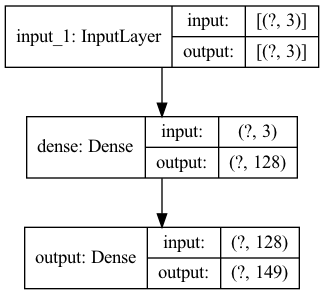

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 2s 208us/sample - loss: 0.0093 - root_mean_squared_error: 0.0962 - val_loss: 9.5540e-04 - val_root_mean_squared_error: 0.0309
Epoch 2/100
10000/10000 [==============================] - 1s 120us/sample - loss: 6.0844e-04 - root_mean_squared_error: 0.0247 - val_loss: 3.9914e-04 - val_root_mean_squared_error: 0.0200
Epoch 3/100
10000/10000 [==============================] - 1s 104us/sample - loss: 3.7093e-04 - root_mean_squared_error: 0.0193 - val_loss: 2.2459e-04 - val_root_mean_squared_error: 0.0150
Epoch 4/100
10000/10000 [==============================] - 1s 94us/sample - loss: 2.0662e-04 - root_mean_squared_error: 0.0144 - val_loss: 1.0411e-04 - val_root_mean_squared_error: 0.0102
Epoch 5/100
10000/10000 [==============================] - 1s 95us/sample - loss: 1.1955e-04 - root_mean_squared_error: 0.0109 - val_loss: 9.6011e-05 - val_root_mean_squared_error: 0.0098
Epoch 6/100


10000/10000 [==============================] - 1s 106us/sample - loss: 4.0680e-05 - root_mean_squared_error: 0.0064 - val_loss: 5.8951e-05 - val_root_mean_squared_error: 0.0077
Epoch 45/100
10000/10000 [==============================] - 1s 107us/sample - loss: 4.9927e-05 - root_mean_squared_error: 0.0071 - val_loss: 2.6805e-05 - val_root_mean_squared_error: 0.0052
Epoch 46/100
10000/10000 [==============================] - 1s 105us/sample - loss: 4.0664e-05 - root_mean_squared_error: 0.0064 - val_loss: 2.4490e-05 - val_root_mean_squared_error: 0.0049
Epoch 47/100
10000/10000 [==============================] - 1s 122us/sample - loss: 5.5042e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.7651e-05 - val_root_mean_squared_error: 0.0094
Epoch 48/100
10000/10000 [==============================] - 1s 116us/sample - loss: 6.7573e-05 - root_mean_squared_error: 0.0082 - val_loss: 3.1353e-05 - val_root_mean_squared_error: 0.0056
Epoch 49/100
10000/10000 [==============================] - 1s 

10000/10000 [==============================] - 1s 113us/sample - loss: 3.8101e-05 - root_mean_squared_error: 0.0062 - val_loss: 1.2409e-04 - val_root_mean_squared_error: 0.0111
Epoch 88/100
10000/10000 [==============================] - 1s 114us/sample - loss: 3.9373e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.0621e-05 - val_root_mean_squared_error: 0.0055
Epoch 89/100
10000/10000 [==============================] - 1s 139us/sample - loss: 4.5707e-05 - root_mean_squared_error: 0.0068 - val_loss: 3.1630e-05 - val_root_mean_squared_error: 0.0056
Epoch 90/100
10000/10000 [==============================] - 1s 120us/sample - loss: 3.4742e-05 - root_mean_squared_error: 0.0059 - val_loss: 5.5793e-05 - val_root_mean_squared_error: 0.0075
Epoch 91/100
10000/10000 [==============================] - 1s 109us/sample - loss: 4.9346e-05 - root_mean_squared_error: 0.0070 - val_loss: 5.6939e-05 - val_root_mean_squared_error: 0.0075
Epoch 92/100
10000/10000 [==============================] - 1s 

In [46]:
results = []
for p in [{'a': 0.01, 'n': 128, 'e':100, 'nr_train':10000},
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, Y_train, X_test, Y_test, a_fo_max_train, a_en_max_train, Ts_max_train  = get_data(nr_train)
    
    history, model = run_model(
        X_train, Y_train, X_test, Y_test,
        neurons = neurons, learning_rate=alpha, 
        epochs = epochs, verbose=1)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test])
    print('nr_train: ', nr_train, 'neurons: ', neurons, 'alpha: ', alpha, 'epochs: ', epochs, 'loss: ', history.history['loss'][-1])

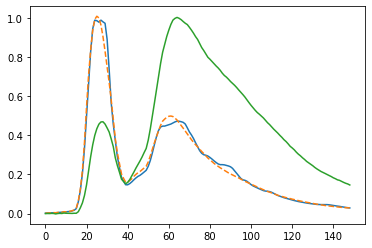

In [49]:
plt.plot( results[0][-2].predict(((8/a_fo_max_train, 0.0/a_en_max_train,250/Ts_max_train),) )[0] )
plt.plot( results[0][-2].predict(((0/a_fo_max_train, 0.0/a_en_max_train,250/Ts_max_train),) )[0],"--" )
plt.plot( results[0][-2].predict(((0/a_fo_max_train, 0.0/a_en_max_train,150/Ts_max_train),) )[0] )
plt.show()

### The model

In [92]:
def run_deepNN_oneoutput(X_train, Y_train, X_test, Y_test, neurons = 128, learning_rate=0.005, epochs = 100, verbose=0):

    def make_NN_model(input_shape):
        input_data = tf.keras.Input(shape=input_shape)
        D1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)
        output = tf.keras.layers.Dense(units= 1, name='output')(D1)
        model = tf.keras.Model(inputs=input_data, outputs=output)
        return model

    NN_model = make_NN_model((X_train.shape[1],))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = tf.keras.optimizers.SGD(lr=learning_rate)
    metrics={'output': tf.keras.metrics.RootMeanSquaredError()}
    loss = {'output': tf.keras.losses.MeanSquaredError()}
    
    NN_model.compile(optimizer=opt,
                     loss=loss,
                     metrics=metrics)

    history = NN_model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=verbose)
    
    return history, NN_model

### Fit for forsterite abundance

In [96]:
results = []
# Not better: {'a': 0.001, 'n': 128, 'e':300, 'nr_train':10000}
#             {'a': 0.01, 'n': 256, 'e':150, 'nr_train':10000}
# BEtter but too slow: {'a': 0.01, 'n': 128, 'e':20, 'nr_train':500000}
for p in [{'a': 0.01, 'n': 128, 'e':150, 'nr_train':10000},
          {'a': 0.01, 'n': 128, 'e':20, 'nr_train':100000},
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, Y_train_fo, _, X_test, Y_test_fo, _ = get_data(nr_train)
    
    history, model = run_deepNN_oneoutput(
        X_train, Y_train_fo, X_test, Y_test_fo,
        neurons = neurons, learning_rate=alpha, 
        epochs = epochs, verbose=0)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test_fo])
    print('nr_train: ', nr_train, 'neurons: ', neurons, 'alpha: ', alpha, 'epochs: ', epochs, 'loss: ', history.history['loss'][-1])

New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  10000 neurons:  128 alpha:  0.01 epochs:  150 loss:  0.009071769592538475
New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  100000 neurons:  128 alpha:  0.01 epochs:  20 loss:  0.008089452619478106


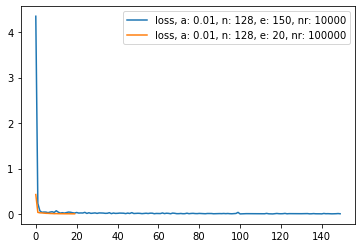

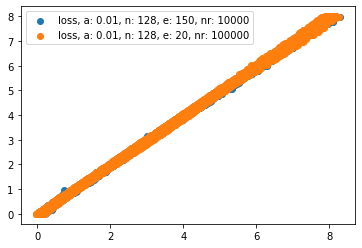

In [97]:
for i in range(len(results)):
    plt.plot(results[i][5].history['loss'], \
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6], results[i][8],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

#plt.show()


### Fit for temperature

In [95]:
results = []
# Not better: {'a': 0.001, 'n': 128, 'e':300, 'nr_train':10000}
#             {'a': 0.01, 'n': 256, 'e':150, 'nr_train':10000}
# BEtter but too slow: {'a': 0.01, 'n': 128, 'e':20, 'nr_train':500000}
for p in [{'a': 0.01, 'n': 128, 'e':20, 'nr_train':10000},
          #{'a': 0.01, 'n': 128, 'e':20, 'nr_train':100000}
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, _, Y_train_T, X_test, _, Y_test_T = get_data(nr_train)

    history, model = run_deepNN_oneoutput(
        X_train, Y_train_T, X_test, Y_test_T,
        neurons = neurons, learning_rate=alpha, 
        epochs = epochs, verbose=0)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test_T])
    print('nr_train: ', nr_train, 'neurons: ', neurons, 'alpha: ', alpha, 'epochs: ', epochs, 'loss: ', history.history['loss'][-1])

New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  10000 neurons:  128 alpha:  0.01 epochs:  20 loss:  2.7725254943847655


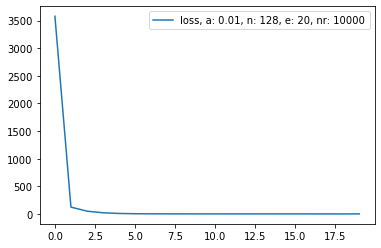

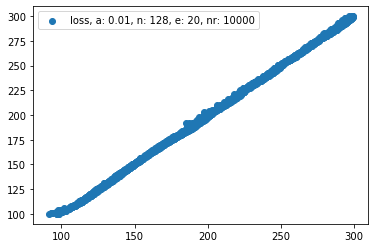

In [94]:
for i in range(len(results)):
    plt.plot(results[i][5].history['loss'], \
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6], results[i][8],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

#plt.show()


## Two variables/output models

In [98]:
def run_deepNN_two_outputs(X_train, Y_train, X_test, Y_test, neurons = 128,\
                           learning_rate=0.005, epochs = 100, verbose=0):

    def make_NN_model(input_shape):
        input_data = tf.keras.Input(shape=input_shape)
        D_fo1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)
        
        D_T1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)

        output_fo = tf.keras.layers.Dense(units= 1, name='output_fo')(D_fo1)
        output_T = tf.keras.layers.Dense(units= 1, name='output_T')(D_T1)
        model = tf.keras.Model(inputs=input_data, outputs=[output_fo, output_T])
        return model

    NN_model = make_NN_model((X_train.shape[1],))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = tf.keras.optimizers.SGD(lr=learning_rate)
    metrics={'output_fo': tf.keras.metrics.RootMeanSquaredError(),\
            'output_T': tf.keras.metrics.RootMeanSquaredError()}
    loss = {'output_fo': 'mse',#tf.keras.losses.MeanSquaredError(),\
           'output_T': 'mse'}#tf.keras.losses.MeanSquaredError()}

    
    NN_model.compile(optimizer=opt,
                     loss=loss,
                     metrics=metrics)


    
    history = NN_model.fit(X_train, Y_train, epochs=epochs, \
                           batch_size=10,\
                           validation_data=(X_test, Y_test), verbose=verbose)

    
    
    return history, NN_model

New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  10000 neurons:  alpha:  0.005 epochs:  100 loss:  0.9758442305773497 output_fo_loss:  0.010806088 output_T_loss:  0.96503896


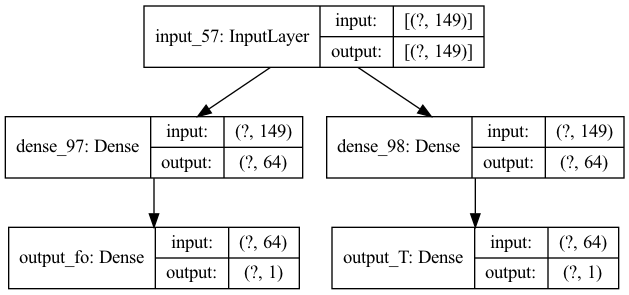

In [99]:
results = []
# Does not work: 
# - One layer does not work
# - Two layer do not wor

# Starts to work
# - Second layer for only forsterite starts to work

# Important: got it to work with the Adam optimizer, not the SGD
for p in [{'a': 0.005, 'n': 64, 'e':100, 'nr_train':10000},\
          #{'a': 0.001, 'n': 128, 'n2':64, 'n3':32, 'e':20, 'nr_train':10000},\
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, Y_train_fo, Y_train_T, X_test, Y_test_fo, Y_test_T = get_data(nr_train)
    Y_train = (Y_train_fo, Y_train_T)
    Y_test = (Y_test_fo, Y_test_T)
    
    history, model = run_deepNN_two_outputs(
        X_train, Y_train, X_test, Y_test,
        neurons = neurons, \
        learning_rate=alpha, 
        epochs = epochs, verbose=0)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test])
    print('nr_train: ', nr_train, 'neurons: ', \
          'alpha: ', alpha, 'epochs: ', epochs, \
          'loss: ', history.history['loss'][-1],\
          'output_fo_loss: ', history.history['output_fo_loss'][-1],\
          'output_T_loss: ', history.history['output_T_loss'][-1],\
         )

    display(plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png'))
    


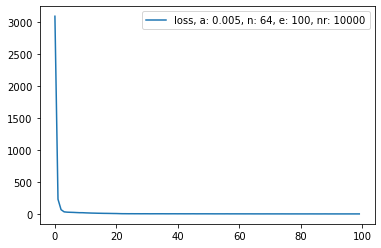

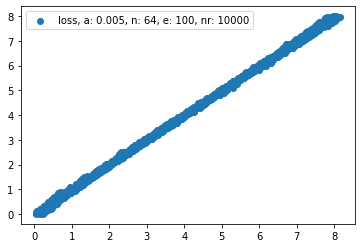

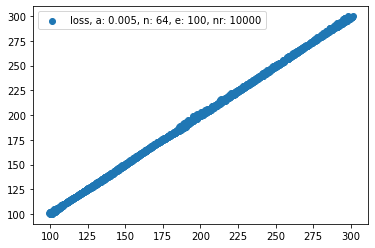

In [100]:
for i in range(len(results)):
    plt.plot(results[i][5].history['loss'], \
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6][0], results[i][8][0],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6][1], results[i][8][1],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()